In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

from vbe_arithmetic import ripple_add, create_circuit

In [16]:
# Input bits
a_dec = 10
b_dec = 7

# 10 * 10 = 100

# Number of bits in the binary numbers
N = a_dec.bit_length() + b_dec.bit_length()

qc, a, b, c, ca, cb = create_circuit(a_dec, 0, N)


In [17]:
# Add 'a' to itself 'b_dec' times
for _ in range(0, b_dec):
    ripple_add(qc, a, b, c, N)

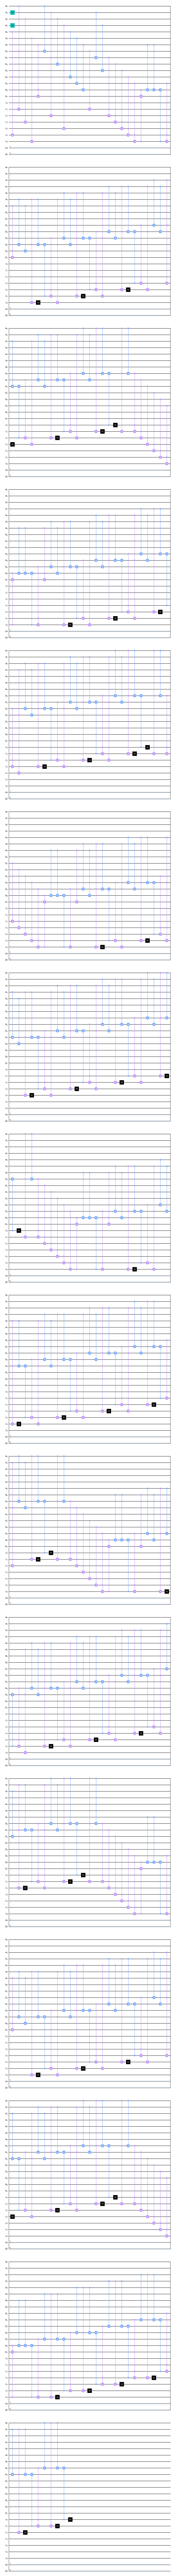

In [18]:
qc.draw(output="mpl", filename="circuits/1996_multiplier.png", style="clifford")

In [19]:
qc.measure(a, ca)
qc.measure(b, cb)

backend_sim = AerSimulator()
job_sim = backend_sim.run(qc, shots=1)
result_sim = job_sim.result()

print(result_sim.get_counts(qc))

{'01000110 0001010': 1}
